<a href="https://colab.research.google.com/github/khalilkhan1111/Netflix_movies_and_tv_shows_clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -**          - Khalil Ullah Khan

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/khalilkhan1111/Netflix_movies_and_tv_shows_clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Import libraries for python
import numpy as np
import pandas as pd
from numpy import math

# Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

#Importing Machine Learning libraries
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import missingno as msno
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/imp/project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Dataset last five rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

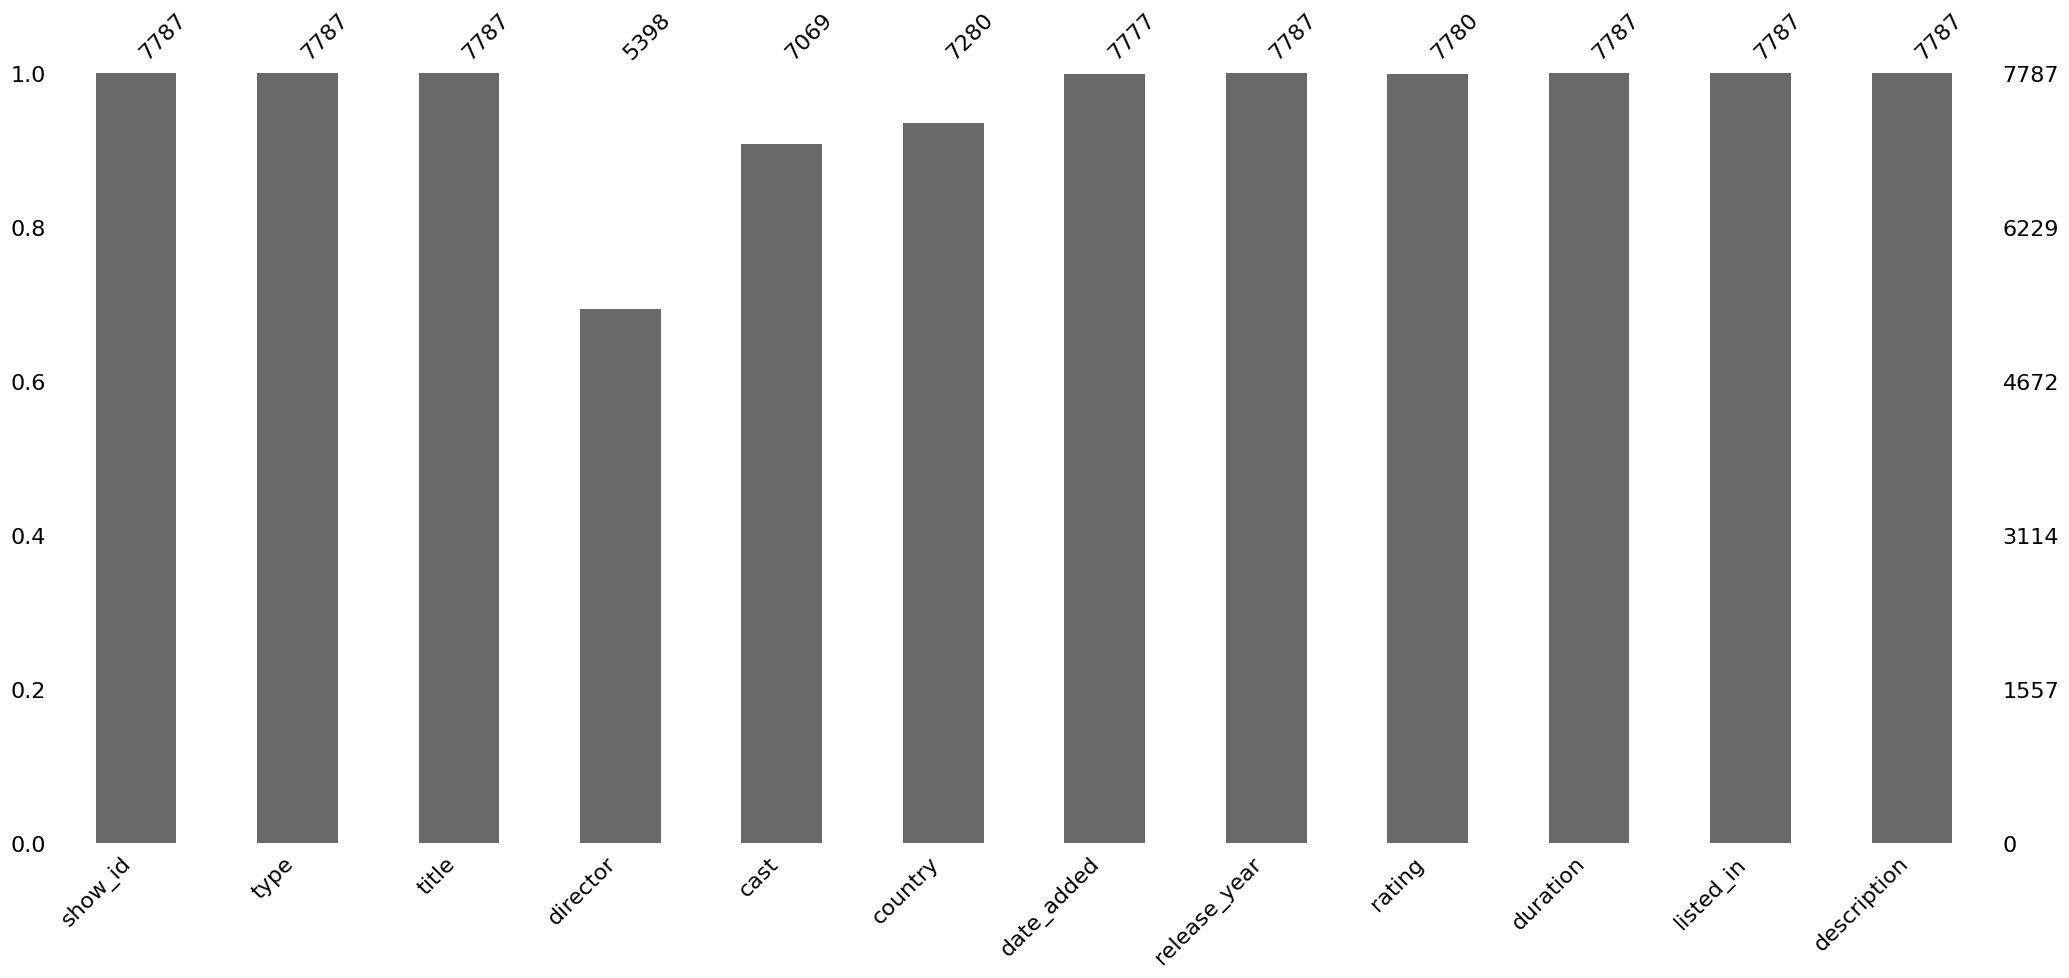

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

In the dataset. Column null value are -  director=2389,cast =718,country=507,date_added=10, rating=7.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

1. **show_id** : Unique ID for every Movie / Tv Show

2. **type** : Identifier - A Movie or TV Show

3. **title** : Title of the Movie / Tv Show

4. **director** : Director of the Movie

5. **cast** : Actors involved in the movie / show

6. **country** : Country where the movie / show was produced

7. **date_added** : Date it was added on Netflix

8. **release_year** : Actual Releaseyear of the movie / show

9. **rating** : TV Rating of the movie / show

10. **duration** : Total Duration - in minutes or number of seasons

11. **listed_in** : Genere

12. **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'show_id': ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
Unique values in column 'type': ['TV Show' 'Movie']
Unique values in column 'title': ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
Unique values in column 'director': [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
Unique values in column 'cast': ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
Unique v

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# drop the null columns in each variables
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
df["date_added"] = pd.to_datetime(df['date_added'])

# Year_added
df['year_added'] = df['date_added'].dt.year

#Adding month column from 'date_added'
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()

# Droping the month_added columns
df.drop(['date_added'],axis=1,inplace=True)

In [ ]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_rating'] = df['rating'].replace(rating_ages)
df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'month_name_added', 'age_rating'],
      dtype='object')

### What all manipulations have you done and insights you found?

drop down the null values add some columns are year_added, month_added, month_name_added, age_rating


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

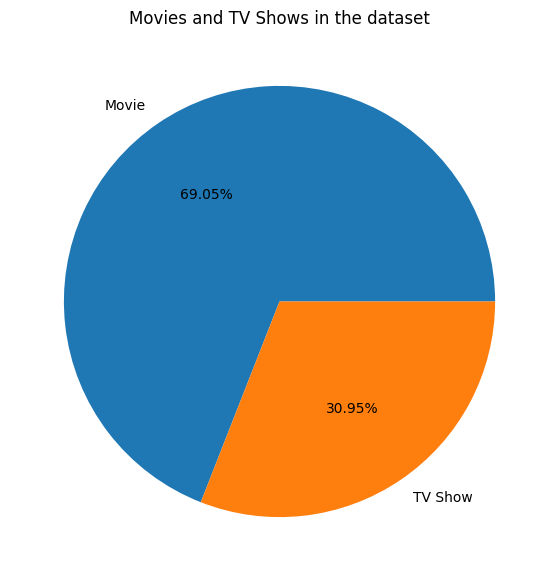

In [ ]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

To know the percentage between movies and tv shows.

##### 2. What is/are the insight(s) found from the chart?

In netflix there is more movie 69.05% as compare to TV shows which is 30.95%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that movies make up a significant portion of the content can help Netflix make informed decisions about acquiring and producing movies. They can focus on popular genres or invest in exclusive movie deals to attract and retain subscribers who have a preference for movies.

#### Chart - 2

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

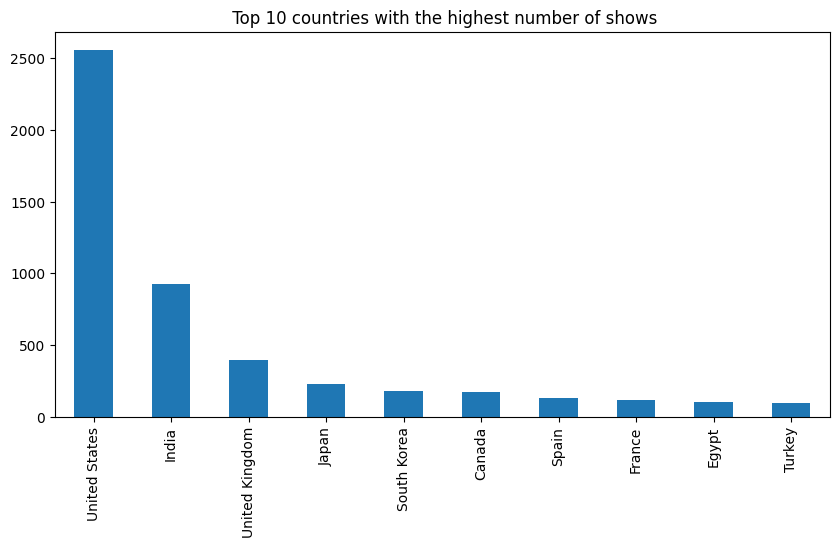

In [ ]:
# Chart - 2 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

 The bar chart is chosen for its ability to display and compare the number of shows for different countries in a visually appealing and easily interpretable manner.

##### 2. What is/are the insight(s) found from the chart?

The chart provides a clear visualization of the distribution of shows across different countries. US has a highest number of shows and India is second highest.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

They can inform decisions regarding content acquisition, localization efforts, and expansion strategies to cater to the preferences and demands of specific regions or target audiences.

#### Chart - 3

Text(0.5, 1.0, 'distribution by released year')

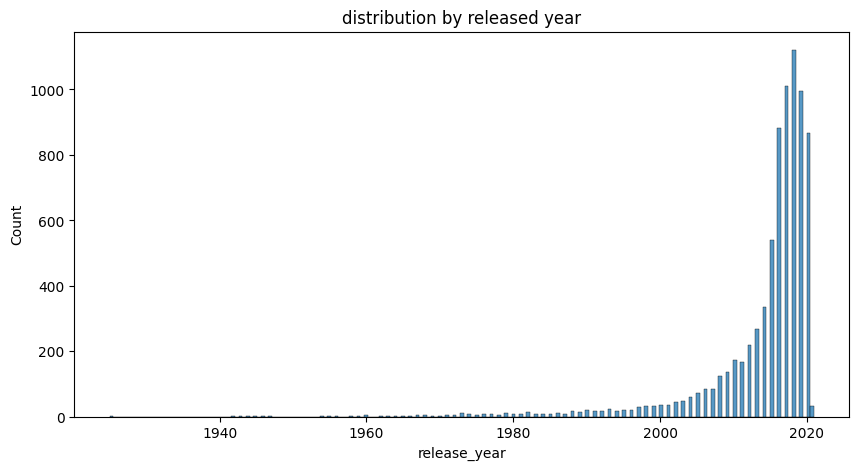

In [ ]:
# Chart - 3 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

The histogram is a suitable choice for this scenario because it allows us to visualize the frequency or count of releases across different years.

##### 2. What is/are the insight(s) found from the chart?

The histogram provides an overview of the distribution of releases over the years. It helps identify any notable trends or patterns in content production, such as periods with a higher or lower number of releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing trends in content production can guide decision-making regarding the types of movies or TV shows to acquire or produce.

#### Chart - 4

<Axes: xlabel='age_rating', ylabel='count'>

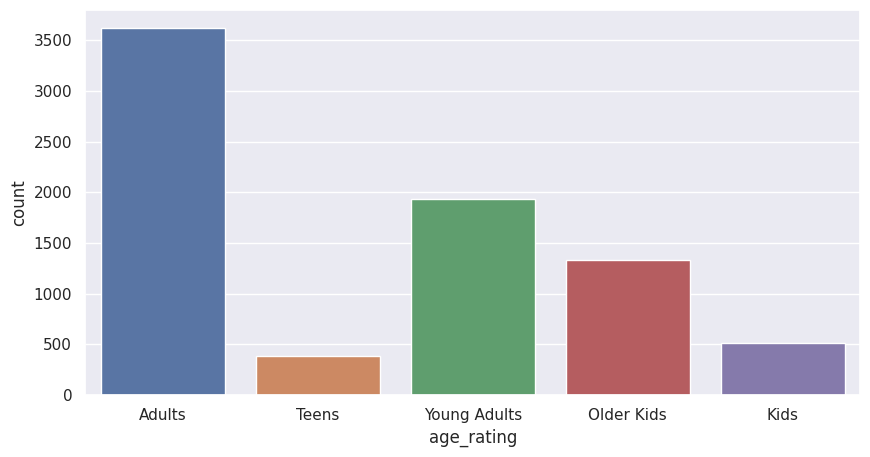

In [ ]:
# Chart - 4 visualization code
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='age_rating',data=df)

##### 1. Why did you pick the specific chart?

 it allows us to visualize the frequency or count of different categories (age ratings) in a categorical variable (shows).

##### 2. What is/are the insight(s) found from the chart?

Adults and Young adults love to spend more time in netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to make movies or tv shows as per adults and young adults love to watch it is our target audience.

#### Chart - 5

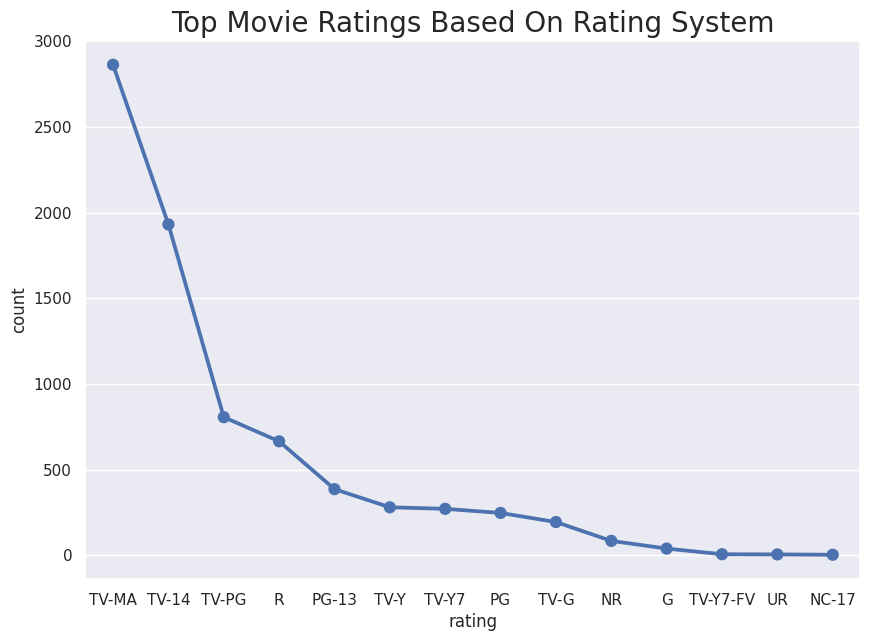

In [ ]:
# Chart - 5 visualization code
#Plotting the ratings on movies on pointplot
movie_ratings = df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

The pointplot is an appropriate choice for this scenario because it allows us to display the relationship between  ratings and the count of movies

##### 2. What is/are the insight(s) found from the chart?

The variations in the line segments connecting the points provide insights into the distribution of movie counts across different ratings. The slope and direction of the lines can reveal patterns or trends in the distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the pointplot can help in targeting specific audience segments based on their preferred ratings.

#### Chart - 6

Text(0.5, 1.0, 'Top 10 genres')

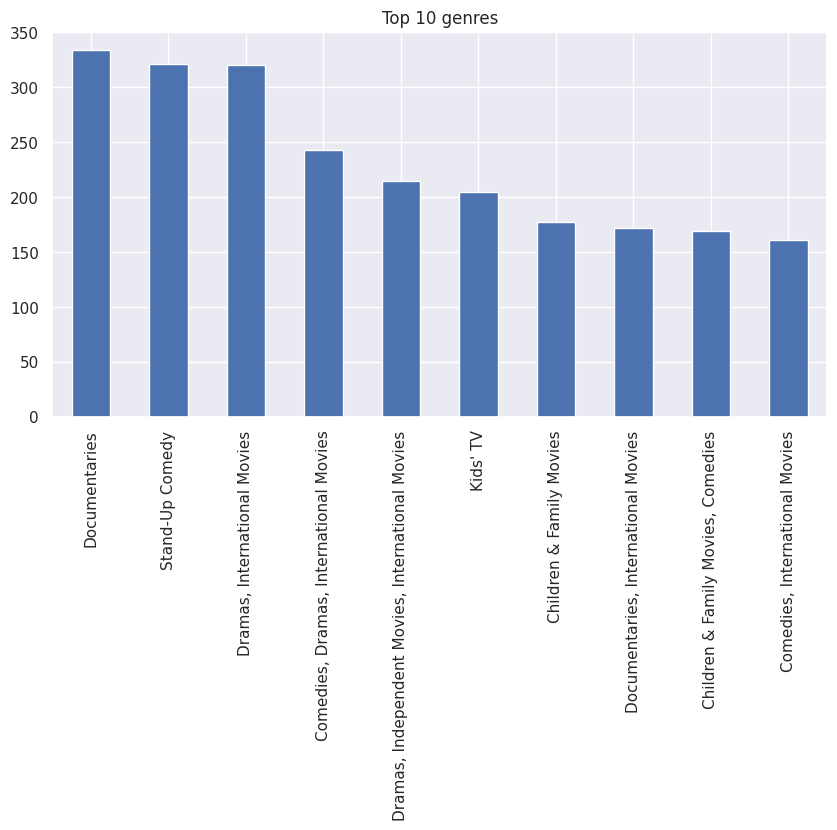

In [ ]:
# Chart - 6 visualization code
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

The bar chart is an appropriate choice for this scenario because it allows for a clear comparison of the frequency or count of each genre.

##### 2. What is/are the insight(s) found from the chart?

 The bar chart helps identify the genres that are most prevalent in the dataset. By observing the heights of the bars, viewers can identify the genres with the highest counts, indicating their popularity or frequency in the content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 This strategy can attract a larger audience, increase viewer engagement, and positively impact business growth.

#### Chart - 7

Text(0.5, 0, '')

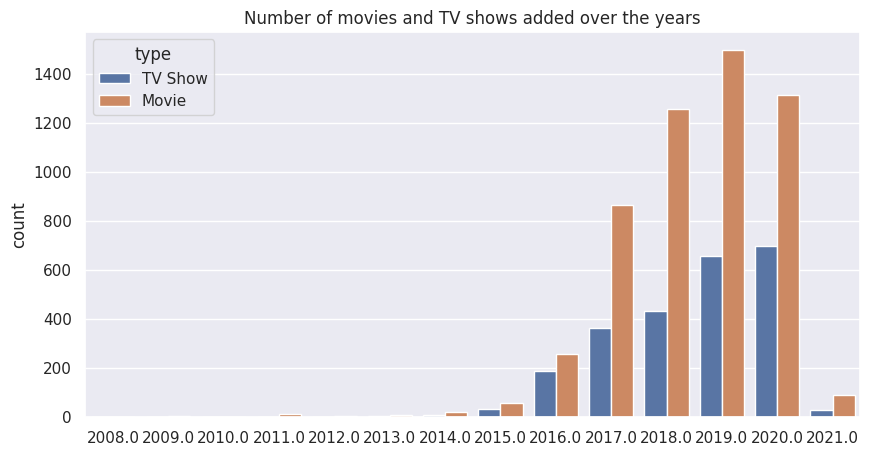

In [ ]:
# Chart - 7 visualization code
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

The specific chart chosen in this case is a countplot with hue to visualize the number of movies and TV shows added over the years.



##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the growth of content over time by showcasing the number of movies and TV shows added each year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights into content growth and the differential growth between movies and TV shows can inform content strategy.

#### Chart - 8

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

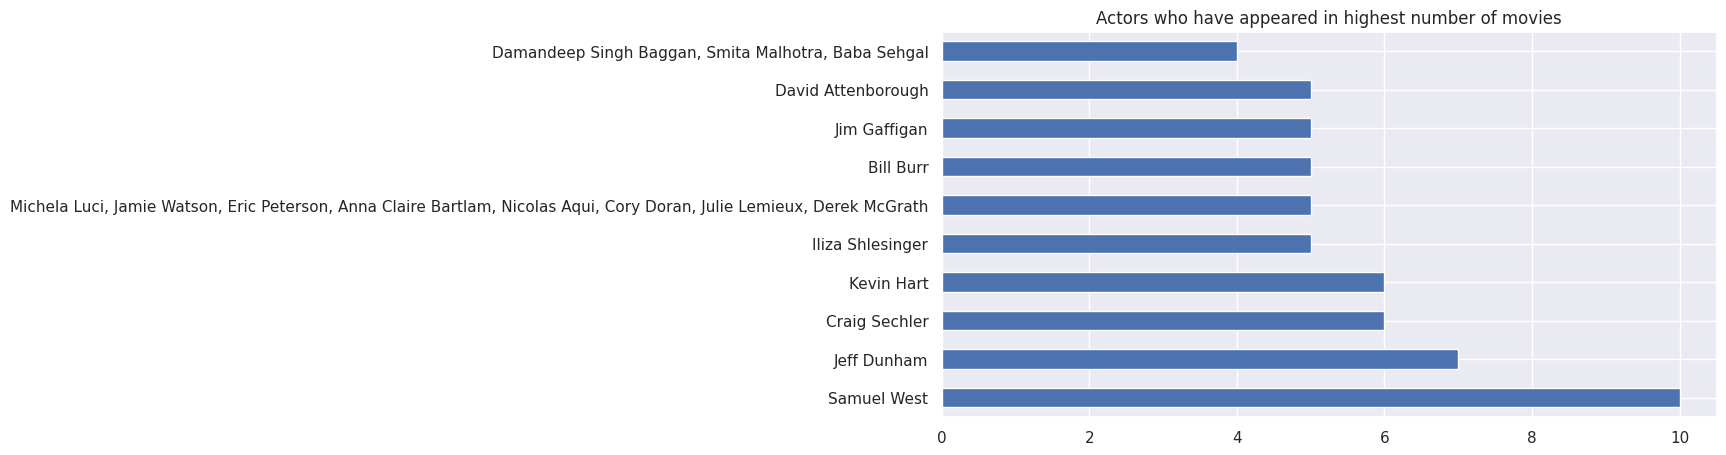

In [ ]:
# Chart - 8 visualization code
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

##### 1. Why did you pick the specific chart?

The horizontal bar chart is an appropriate choice for this scenario because it allows for easy comparison of the actors and their respective movie counts.

##### 2. What is/are the insight(s) found from the chart?




 This insight can provide an indication of actors who consistently attract viewers or have a strong presence in the movie industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights into the most prolific actors can be valuable for content creators, distributors, and platforms in attracting audiences. By featuring actors with a strong track record and a large number of movie appearances, businesses can leverage their popularity and appeal to draw in viewers. This can lead to increased viewership, engagement, and positive business impact

#### Chart - 9

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

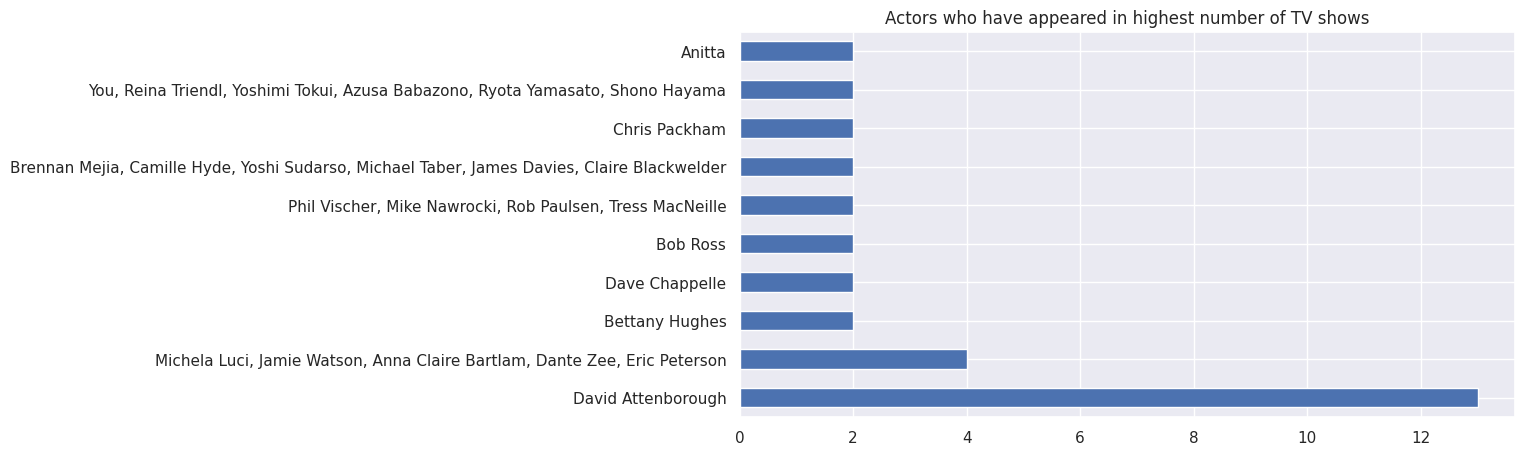

In [ ]:
# Chart - 9 visualization code
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

##### 1. Why did you pick the specific chart?

The horizontal bar chart is an appropriate choice for this scenario because it allows for easy comparison of the actors and their respective TV show counts.

##### 2. What is/are the insight(s) found from the chart?

The actors with the highest TV show counts reflect their popularity and demand in the TV industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Partnering with successful TV show actors can enhance brand visibility, credibility, and audience appeal, leading to positive business impact.

#### Chart - 11 - Pair Plot

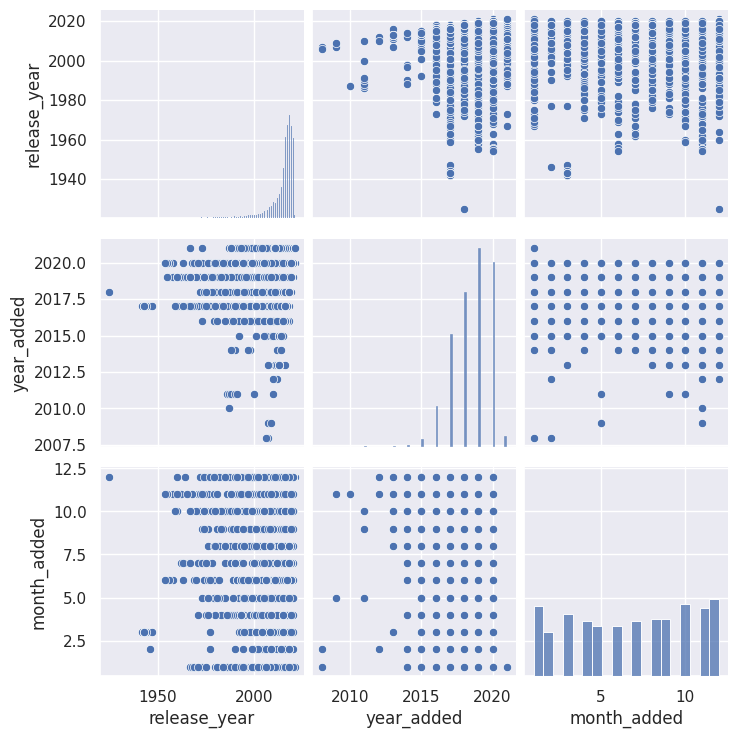

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

The pair plot is a suitable choice for this scenario because it allows for the visualization of pairwise relationships between multiple variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

By observing the scatter plots, clusters or groups of data points may become apparent. This can indicate patterns or subgroups within the data, suggesting the presence of distinct categories or relationships between variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Already done

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [4]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
df['listed_in_encoded'] = label_encoder.fit_transform(df['listed_in'])
df['rating_encoded'] = label_encoder.fit_transform(df['rating'])


#### What all categorical encoding techniques have you used & why did you use those techniques?

LabelEncoder is a basic encoding technique that assigns a unique numerical label to each unique category in a categorical variable. It is commonly used when dealing with ordinal categorical variables

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [5]:
# Lower Casing
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#### 3. Removing Punctuations

In [6]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [7]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in_encoded,rating_encoded
0,s1,tv show,3%,NaN,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",2020,tv-ma,4 seasons,"international tv shows, tv dramas, tv sci-fi &...",in a future where the elite inhabit an island ...,398,8
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",2016,tv-ma,93 min,"dramas, international movies",after a devastating earthquake hits mexico cit...,310,8
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",2011,r,78 min,"horror movies, international movies",when an army recruit is found dead his fellow ...,336,5
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",2009,pg-13,80 min,"action & adventure, independent movies, sci-fi...",in a postapocalyptic world ragdoll robots hide...,47,4
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",2008,pg-13,123 min,dramas,a brilliant group of students become cardcount...,294,4


In [25]:
#Remove punctuation for listed_in
df['listed_in'] = df['listed_in'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits


#### 5. Removing Stopwords & Removing White spaces

In [13]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Extracting the stopwords from nltk library
sw = stopwords.words('english')

# Defining stopwords function
def remove_stopwords(text):
    '''A function for removing the stopwords'''
    # Removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # Joining the list of words with a space separator
    return " ".join(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['description'] = df['description'].apply(remove_stopwords)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in_encoded,rating_encoded
0,s1,tv show,3%,NaN,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",2020,tv-ma,4 seasons,"international tv shows, tv dramas, tv sci-fi &...",future elite inhabit island paradise far crowd...,398,8
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",2016,tv-ma,93 min,"dramas, international movies",devastating earthquake hits mexico city trappe...,310,8
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",2011,r,78 min,"horror movies, international movies",army recruit found dead fellow soldiers forced...,336,5
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",2009,pg-13,80 min,"action & adventure, independent movies, sci-fi...",postapocalyptic world ragdoll robots hide fear...,47,4
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",2008,pg-13,123 min,dramas,brilliant group students become cardcounting e...,294,4


In [27]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply(remove_stopwords)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in_encoded,rating_encoded
0,s1,tv show,3%,NaN,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",2020,tv-ma,4 seasons,international tv shows tv dramas tv scifi fantasy,futureeliteinhabitislandparadisefarcrowdedslum...,398,8
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",2016,tv-ma,93 min,dramas international movies,devastatingearthquakehitsmexicocitytrappedsurv...,310,8
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",2011,r,78 min,horror movies international movies,armyrecruitfounddeadfellowsoldiersforcedconfro...,336,5
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",2009,pg-13,80 min,action adventure independent movies scifi fantasy,postapocalypticworldragdollrobotshidefeardange...,47,4
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",2008,pg-13,123 min,dramas,brilliantgroupstudentsbecomecardcountingexpert...,294,4


In [16]:
# Remove White spaces
df['description'] = df['description'].str.replace(r'\s+', '', regex=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in_encoded,rating_encoded
0,s1,tv show,3%,NaN,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",2020,tv-ma,4 seasons,"international tv shows, tv dramas, tv sci-fi &...",futureeliteinhabitislandparadisefarcrowdedslum...,398,8
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",2016,tv-ma,93 min,"dramas, international movies",devastatingearthquakehitsmexicocitytrappedsurv...,310,8
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",2011,r,78 min,"horror movies, international movies",armyrecruitfounddeadfellowsoldiersforcedconfro...,336,5
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",2009,pg-13,80 min,"action & adventure, independent movies, sci-fi...",postapocalypticworldragdollrobotshidefeardange...,47,4
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",2008,pg-13,123 min,dramas,brilliantgroupstudentsbecomecardcountingexpert...,294,4


Stemming

In [18]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [19]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [21]:
from nltk.stem import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [24]:
#stemming for description
df['description'] = df['description'].apply(stemming)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in_encoded,rating_encoded
0,s1,tv show,3%,NaN,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",2020,tv-ma,4 seasons,"international tv shows, tv dramas, tv sci-fi &...",futureeliteinhabitislandparadisefarcrowdedslum...,398,8
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",2016,tv-ma,93 min,"dramas, international movies",devastatingearthquakehitsmexicocitytrappedsurv...,310,8
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",2011,r,78 min,"horror movies, international movies",armyrecruitfounddeadfellowsoldiersforcedconfro...,336,5
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",2009,pg-13,80 min,"action & adventure, independent movies, sci-fi...",postapocalypticworldragdollrobotshidefeardange...,47,4
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",2008,pg-13,123 min,dramas,brilliantgroupstudentsbecomecardcountingexpert...,294,4


In [29]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()

In [31]:
#stemming for listed_in
df['listed_in'] = df['listed_in'].apply(stemming)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in_encoded,rating_encoded
0,s1,tv show,3%,NaN,"joão miguel, bianca comparato, michel gomes, r...",brazil,"august 14, 2020",2020,tv-ma,4 seasons,internationaltvshowstvdramastvscififantasi,futureeliteinhabitislandparadisefarcrowdedslum...,398,8
1,s2,movie,7:19,jorge michel grau,"demián bichir, héctor bonilla, oscar serrano, ...",mexico,"december 23, 2016",2016,tv-ma,93 min,dramasinternationalmovi,devastatingearthquakehitsmexicocitytrappedsurv...,310,8
2,s3,movie,23:59,gilbert chan,"tedd chan, stella chung, henley hii, lawrence ...",singapore,"december 20, 2018",2011,r,78 min,horrormoviesinternationalmovi,armyrecruitfounddeadfellowsoldiersforcedconfro...,336,5
3,s4,movie,9,shane acker,"elijah wood, john c. reilly, jennifer connelly...",united states,"november 16, 2017",2009,pg-13,80 min,actionadventureindependentmoviesscififantasi,postapocalypticworldragdollrobotshidefeardange...,47,4
4,s5,movie,21,robert luketic,"jim sturgess, kevin spacey, kate bosworth, aar...",united states,"january 1, 2020",2008,pg-13,123 min,drama,brilliantgroupstudentsbecomecardcountingexpert...,294,4


#### 6. Rephrase Text

In [ ]:
# Rephrase Text


#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [33]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [34]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Select the features and target variable
X = df[['listed_in', 'description']]
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

Calculation of Silhouette Score

In [43]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

# Select the features for clustering
X = df[['listed_in', 'description']]

# Preprocess the 'description' column for text data
vectorizer = TfidfVectorizer()
X_description = vectorizer.fit_transform(X['description']).toarray()

# Preprocess the 'listed_in' column for categorical data
categorical_columns = ['listed_in']

# Define the preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Convert 'listed_in' to a 2-dimensional array
X_listed_in = np.array(X_preprocessed[:, :-1].todense())

# Combine the preprocessed 'listed_in' and 'description' columns
X_preprocessed = np.hstack((X_listed_in, X_description))

# Instantiate the KMeans model with the desired number of clusters
n_clusters = 15  # Specify the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the preprocessed data
kmeans.fit(X_preprocessed)

# Obtain the cluster labels for each sample
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_preprocessed, labels)

print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.09752517365557778


### ML Model - 1 - K-means clustering with silhouette

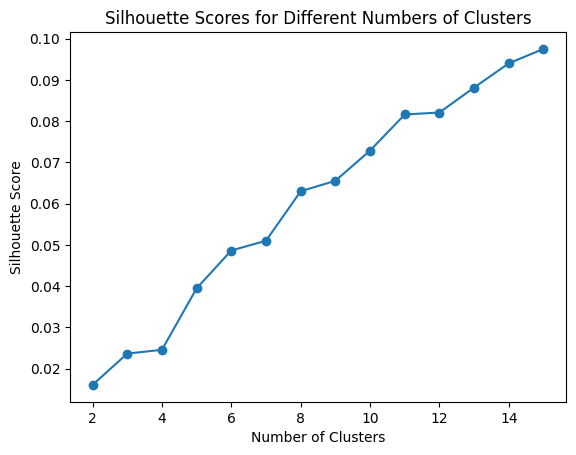

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select the features for clustering
X = df[['listed_in', 'description']]

# Preprocess the data
# ...

# Define the range of cluster numbers to try
min_clusters = 2
max_clusters = 15

# Store the silhouette scores for each number of clusters
silhouette_scores = []

# Iterate through different numbers of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Instantiate the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the preprocessed data
    kmeans.fit(X_preprocessed)

    # Obtain the cluster labels for each sample
    labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_preprocessed, labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

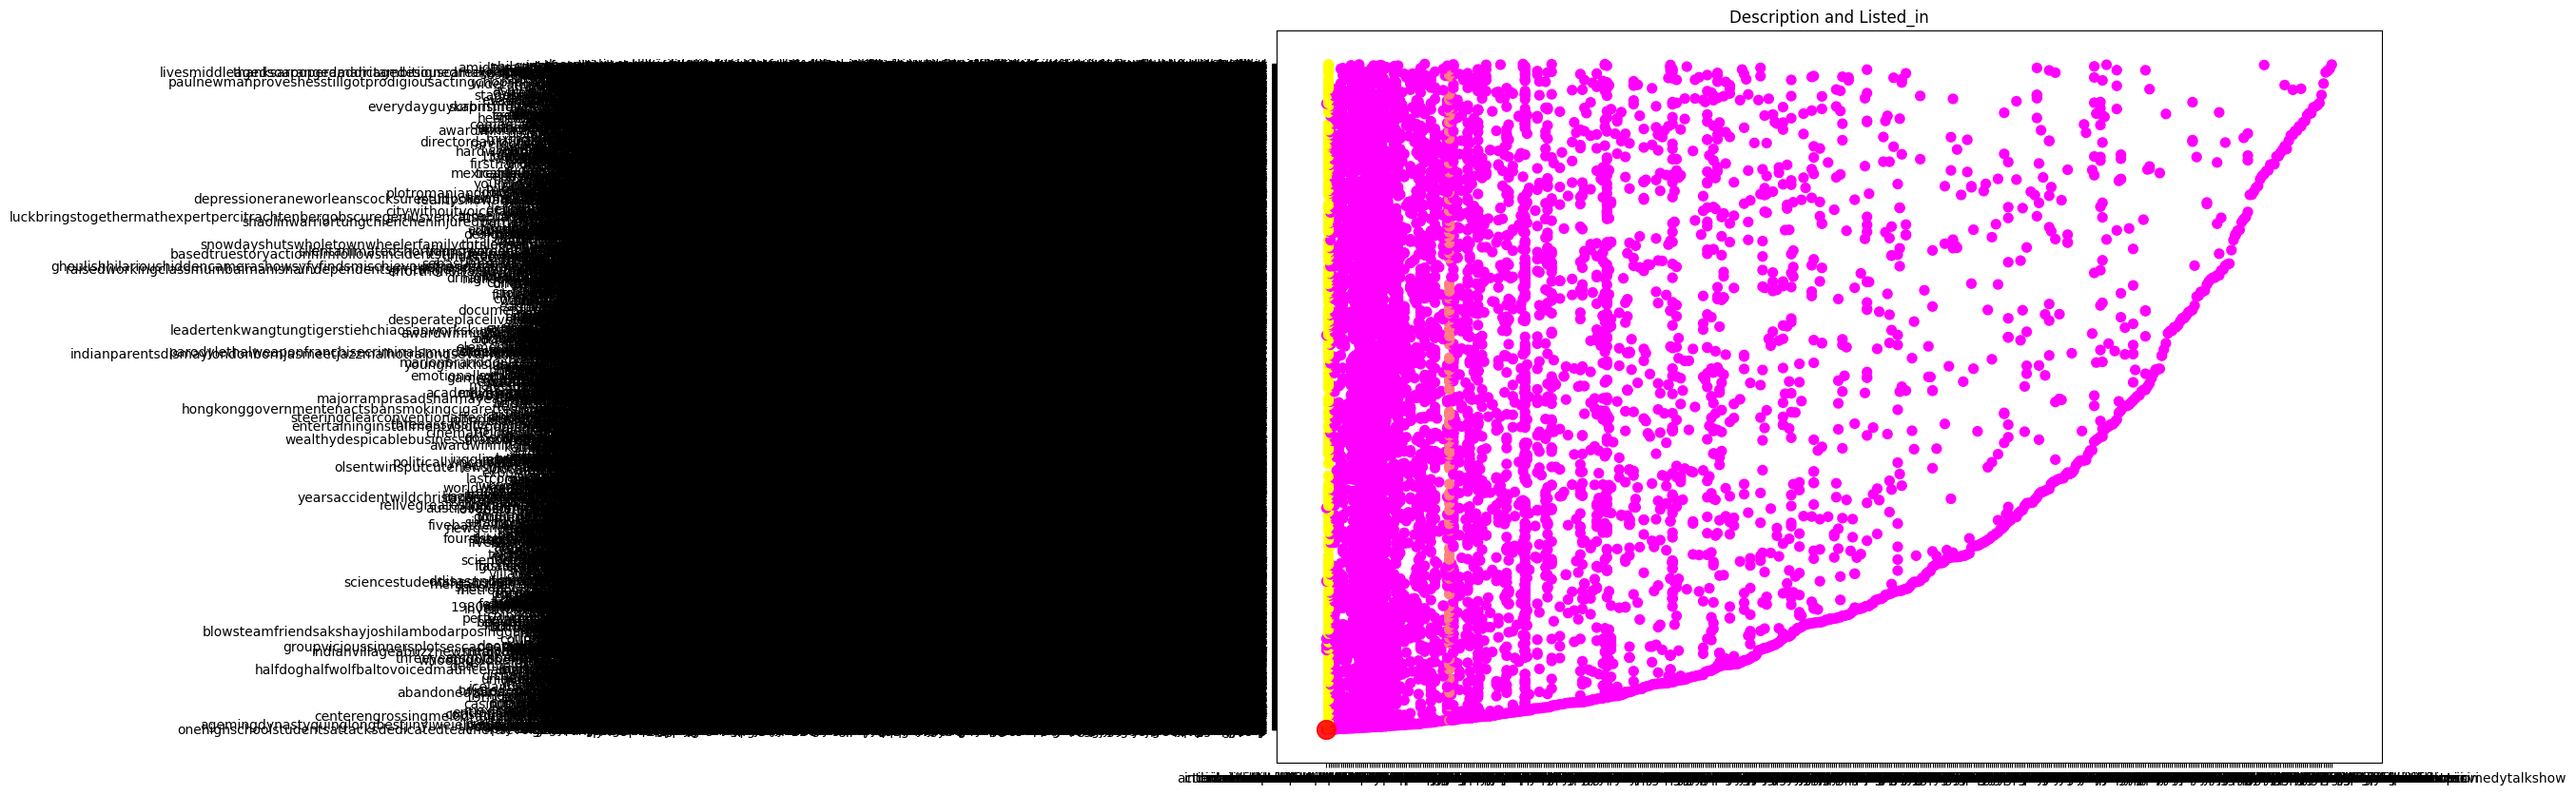

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Select the features for clustering
X = df[['listed_in', 'description']]


# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_preprocessed)
labels = kmeans.labels_

# Plot the scatter plot
plt.figure(figsize=(15, 10))
plt.title('Description and Listed_in')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=np.array([[1, 0, 0, 0.5]]), s=200, alpha=0.5)

plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 -  Hierarchical Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

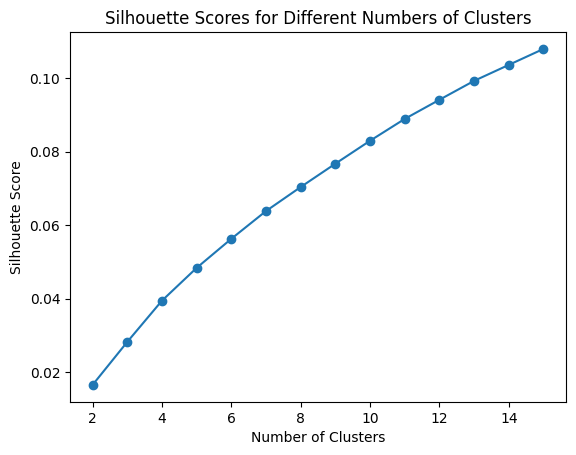

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Select the features for clustering
X = df[['listed_in', 'description']]

# Preprocess the data
# ...

# Define the range of cluster numbers to try
min_clusters = 2
max_clusters = 15

# Store the silhouette scores for each number of clusters
silhouette_scores = []

# Iterate through different numbers of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Instantiate the AgglomerativeClustering model with the current number of clusters
    clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the preprocessed data
    clustering.fit(X_preprocessed)

    # Obtain the cluster labels for each sample
    labels = clustering.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_preprocessed, labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

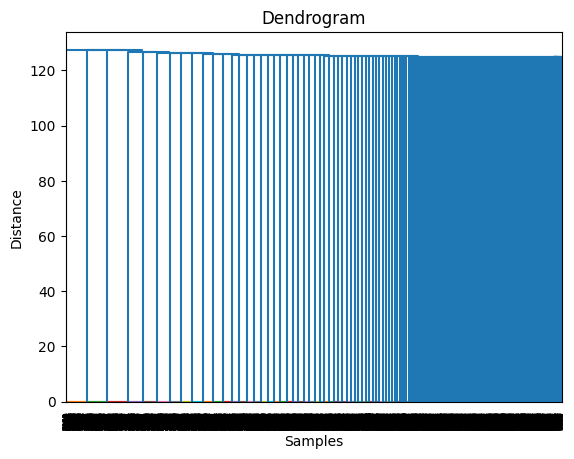

In [62]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Select the categorical features for clustering
categorical_features = df[['listed_in']]

# Apply one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(categorical_features).toarray()

# Preprocess the encoded data (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Perform hierarchical clustering
labels = sch.linkage(X_scaled, method='ward')

# Generate the dendrogram
dendrogram = sch.dendrogram(labels)

# Customize the plot
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

# Display the plot
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Mean Shift Clustering

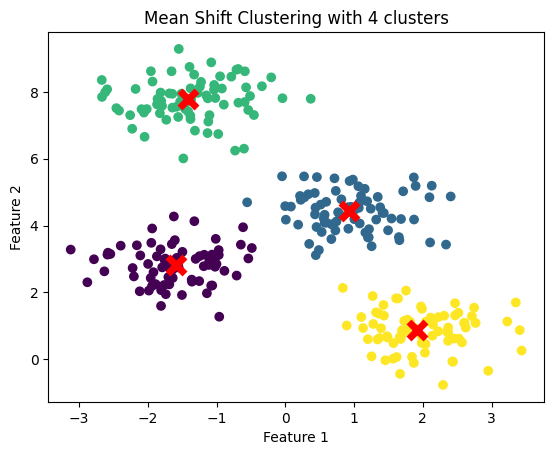

In [69]:
# ML Model - 3 Implementation

import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# Generate sample data (you can replace this with your own data)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Estimate the bandwidth (you can adjust this based on your data)
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

# Obtain the cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Get the number of clusters
n_clusters = len(cluster_centers)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=150, linewidths=5)
plt.title(f'Mean Shift Clustering with {n_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***